In [4]:
import cv2
import numpy as np
import sys
import os
import json
import torch
from probabilistic_formulation.tests.test_factors_lines import create_k3d_plot
import ipyplot

%load_ext autoreload
%autoreload 2

from leveraging_geometry_for_shape_estimation.keypoint_matching.get_matches_3d import load_information_depth_camera,create_pixel_bearing,pb_and_depth_to_wc
from leveraging_geometry_for_shape_estimation.probabilistic_pose_and_shape.pose import init_Rs,init_Ts,get_pb_real_grid,get_R_limits,get_T_limits, create_pose_info_dict, check_gt_pose_in_limits, get_nearest_pose_to_gt
from leveraging_geometry_for_shape_estimation.probabilistic_pose_and_shape.ground_plane import get_model_to_infos,sample_Ts_ground_plane,filter_Ts
from leveraging_geometry_for_shape_estimation.probabilistic_pose_and_shape.translation_from_lines_v9 import *
from leveraging_geometry_for_shape_estimation.probabilistic_pose_and_shape.visualise_T_factors import plot_lines_T_correct_visualisation, get_pointsize_from_Ts


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
exp_path = '/scratch/fml35/experiments/eval_classifier_grid/exp_007_gt_scale_gt_retrieval'

name = 'scene0011_00-000800_01_000_03'

path_precomputed_data = '/scratch2/fml35/datasets/own_data/data_leveraging_geometry_for_shape/data_01'


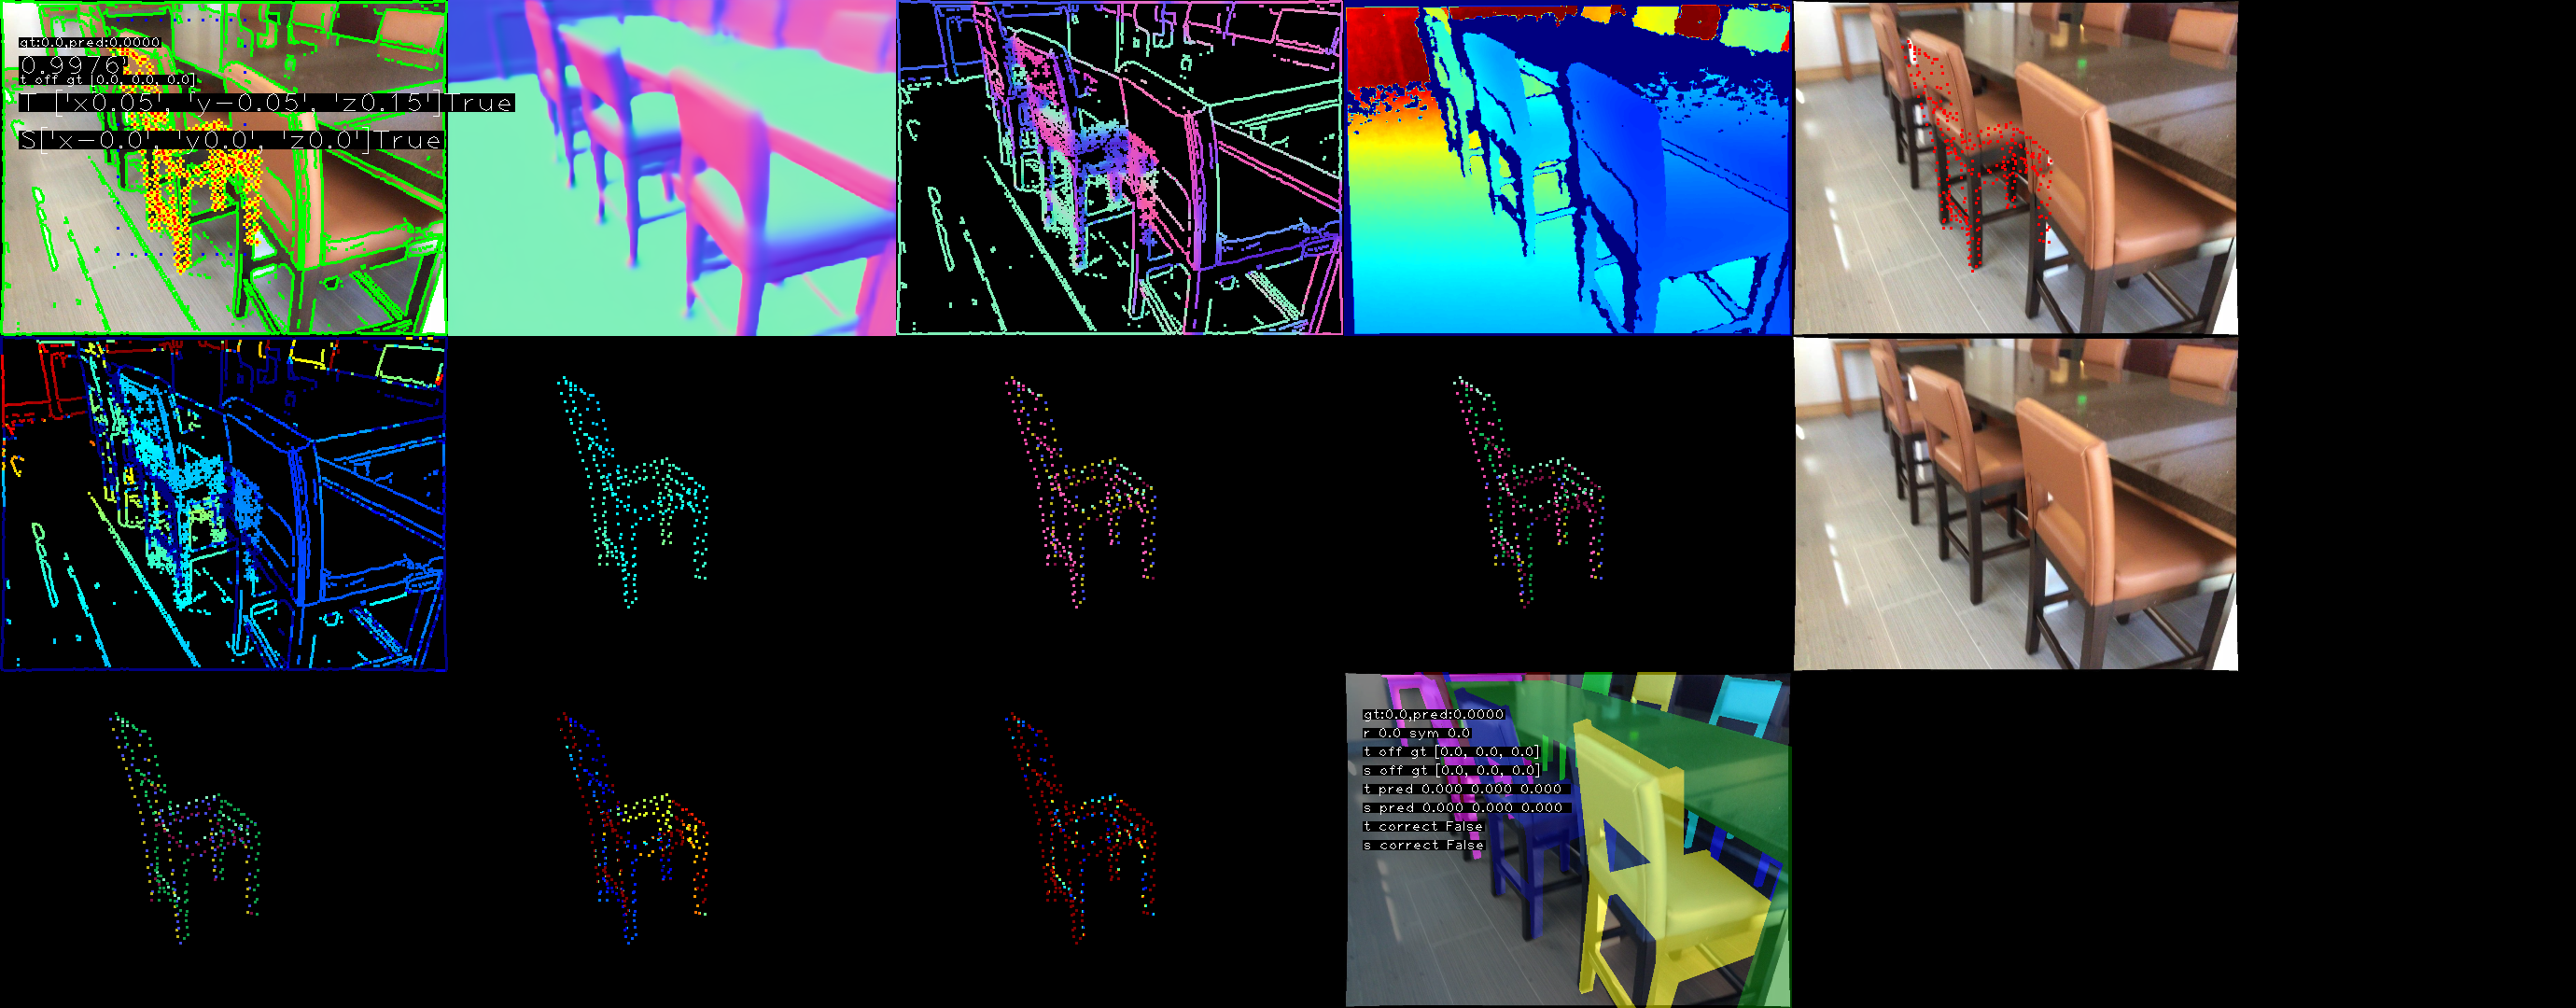


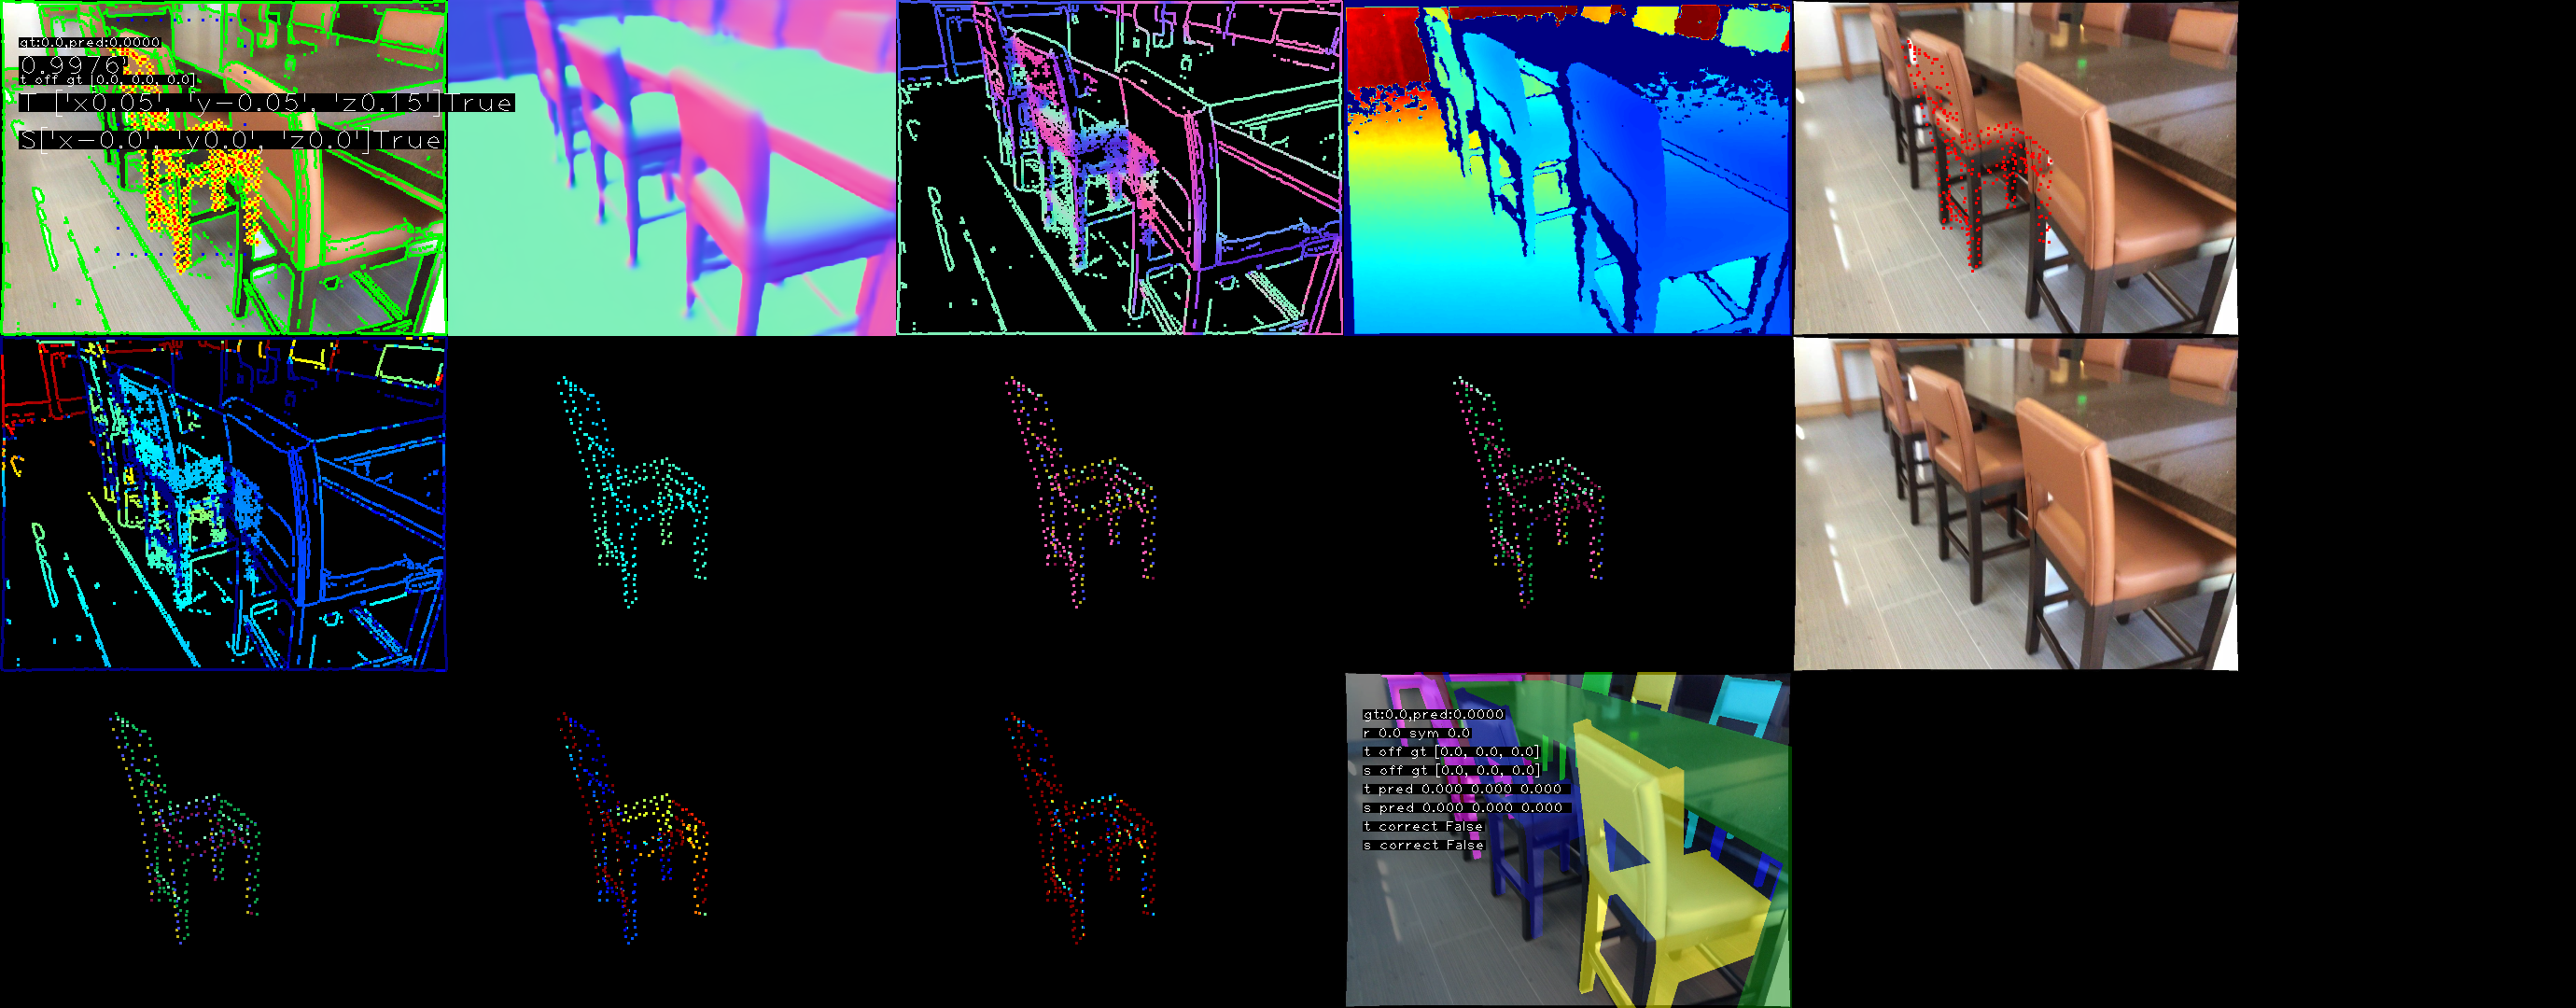

In [6]:
img_vis_sel = cv2.imread(exp_path + '/T_lines_vis/' + name + '_00_selected_T_selected_S.png')
img_vis_closest_gt = cv2.imread(exp_path + '/T_lines_vis/' + name + '_00_closest_T_closest_S.png')

img_vis_sel = cv2.cvtColor(img_vis_sel, cv2.COLOR_BGR2RGB)
img_vis_closest_gt = cv2.cvtColor(img_vis_closest_gt, cv2.COLOR_BGR2RGB)

# ipyplot.plot_images([img_vis_sel,img_vis_closest_gt], max_images=20, img_width=1300)
ipyplot.plot_images([img_vis_sel], max_images=20, img_width=1300)

In [7]:
with open(exp_path + '/T_lines_factors/{}_00.pickle'.format(name),'rb') as f:
    factor_output = pickle.load(f)

with open(path_precomputed_data + '/gt_infos/{}.json'.format(name.rsplit('_',3)[0]),'r') as f:
    gt_infos = json.load(f)

with open(path_precomputed_data + '/bbox_overlap/{}.json'.format(name.rsplit('_',2)[0]),'r') as f:
    bbox_overlap = json.load(f)
# /scratch2/fml35/datasets/own_data/data_leveraging_geometry_for_shape/data_01/bbox_overlap/scene0011_00-000000_00.json

In [10]:
threshold = 0.1
T_gt = gt_infos['objects'][bbox_overlap['index_gt_objects']]['trans_mat']

z_range = [T_gt[2]-0.04,T_gt[2]+0.06]

Ts = factor_output['T']
mask = (Ts[:,2]>z_range[0]) & (Ts[:,2]<z_range[1])
factor_selected = factor_output['factors'][:,0]
print('T_gt',T_gt)
print('Ts',Ts.shape)
print('Ts[mask,:]',Ts[mask,:].shape)

create_k3d_plot(Ts[factor_selected > threshold],factor_selected[factor_selected > threshold],T_gt,point_size=get_pointsize_from_Ts(Ts),highlight='max',relative_highlight_size=1)
# create_k3d_plot(Ts[mask,:],factor_selected[mask],T_gt,point_size=get_pointsize_from_Ts(Ts),highlight='max',relative_highlight_size=1)

T_gt [0.1267497895766844, 0.10478673835636543, 1.816574076028056]
Ts (64000, 3)
Ts[mask,:] (1600, 3)


Output()